# 01 - Exploratory Data Analysis (EDA)

**Purpose**: Explore raw data, understand distributions, NANs, etc.

**Outputs**: Insights only (no saved files). Preprocessing happens in notebook 02.

In [1]:
import sys; sys.path.append('..')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('../data/raw/cancer_endometri.csv')

In [3]:
df[['recidiva', 'recidiva_exitus']].value_counts()

recidiva  recidiva_exitus
0         0                  120
1         1                   29
2         2                    9
0         1                    5
Name: count, dtype: int64

In [4]:
print('hsp_trat_primario' in df.columns)

True


In [5]:
leakage_columns = [
    # leakage
    'recid_super_1',
    'recidiva',
    'fecha_de_recidi',
    'f_muerte',
    'causa_muerte',
    'tto_recidiva',
    'Tt_recidiva_qx',
    'otro_ttIQ_recid',
    'loc_recidiva_r01', 'loc_recidiva_r02', 'loc_recidiva_r03',
    'loc_recidiva_r04', 'loc_recidiva_r05', 'loc_recidiva_r06',
    'numero_de_recid', 'num_recidiva',
    'dx_recidiva',
    'libre_enferm',
    'est_pcte',
    'estado',
    'visita_control',
    'Ultima_fecha',
    'diferencia_dias_reci_exit',
    'despues_diag',


    # soroll
    'codigo_participante',
    'usuario_reg1',
    'f_diag', 'FN', 'fecha_qx', 'f_1v',
    'f_tto_NA',
    'comentarios', 'otras_especifi', 'otra_histo', 'histo_otros',
    'ap_comentarios',
    'inicio_qmt',
    'fecha_final_qmt',
    'tt_o_f_ini',
    'tt_o_f_fin',
    'ini_bqt_rt',
    'final_bqt_rt',
    'ap_gPelv_loc',
    'Tributaria_a_Radioterapia',
    'otros_tt',
    'qt',
    'bqt',
    'moti_no_RT',
    'rdt',
    'estadificacion_',
    'dias_de_ingreso',
    'asa',
    'tiempo_qx',


    # metadata
    'centro_tratPrima',
    'hsp_trat_primario',
    'motivonolaparos',
    'trazador_utiliz',
    'tabla_de_estadi',
    'tabla_de_riesgo',


    # complicacions
    'compl_precoc_r01', 'compl_precoc_r02', 'compl_precoc_r03',
    'compl_precoc_r04', 'compl_precoc_r05', 'compl_precoc_r06',
    'compl_precoc_r07', 'compl_precoc_r08', 'compl_precoc_r09',
    'compl_precoc_r10', 'compl_precoc_r11', 'compl_precoc_r12',
    'compl_precoc_r13', 'compl_precoc_r14',
    'comp_intraop_r01', 'comp_intraop_r02', 'comp_intraop_r03',
    'comp_intraop_r04', 'comp_intraop_r05', 'comp_intraop_r06',
    'comp_intraop_r07', 'otras',
    'comp_claviendin_mes',
    'reintervencion', 'reintervencion_motivo', 'tiempo_transcur',
    'perdida_hematic',
    'perdida_hem_cc',


    # redundant
    'n_resec_Intes',
    'oment_Avan',
    'ciclos_tto_NAdj',
    'transf_GRC',
    'estudio_genetico_r01',
    'estudio_genetico_r02',
    'estudio_genetico_r03',
    'estudio_genetico_r04',
    'estudio_genetico_r05',
    'estudio_genetico_r06',
    'ultraestidaije_GC',
    'inf_param_vag',
    'dias_de_ingreso',


    # diferenciar grups
    'p53_molecular',
    'p53_ihq',
    'mut_pole',
    'msh2',
    'msh6',
    'pms2',
    'mlh1',


    # eliminar
    'Reseccion_macroscopica_complet',
    'Tratamiento_RT',
    'Tratamiento_sistemico',
    'presntado_cTG',
]


prefixos_excloure = ['tec_', 'gc_', 'Motivo_de_conversion_']
columnes_finals = [
    col for col in df.columns
    if col not in leakage_columns
    and not any(col.startswith(prefix) for prefix in prefixos_excloure)
]


print(f"Columnes originals: {len(df.columns)}")
print(f"Columnes eliminades (leakage/soroll): {len(df.columns) - len(columnes_finals)}")
print(f"Columnes finals: {len(columnes_finals)}")


df_clean = df[columnes_finals].copy()


df_clean = df_clean[df_clean['recidiva_exitus'].notna()]
df_clean = df_clean[df_clean['recidiva_exitus'] != 2]


print(f"\n✅ DataFrame net: {df_clean.shape[0]} files x {df_clean.shape[1]} columnes")
print(f"\nColumnes finals:\n{list(df_clean.columns)}")


Columnes originals: 189
Columnes eliminades (leakage/soroll): 134
Columnes finals: 55

✅ DataFrame net: 154 files x 55 columnes

Columnes finals:
['recidiva_exitus', 'edad', 'imc', 'tipo_histologico', 'Grado', 'valor_de_ca125', 'ecotv_infiltsub', 'ecotv_infiltobj', 'metasta_distan', 'grupo_riesgo', 'estadiaje_pre_i', 'tto_NA', 'tto_1_quirugico', 'inten_tto', 'abordajeqx', 'conver_laparo', 'Tec_histerec', 'Anexectomia', 'omentectomia', 'Perforacion_uterina', 'Movilizador_uterino', 'tc_gc', 'histe_avanz', 'histo_defin', 'grado_histologi', 'tamano_tumoral', 'infilt_estr_cervix', 'infiltracion_mi', 'tx_anexial', 'tx_sincronico', 'afectacion_linf', 'afectacion_omen', 'AP_centinela_pelvico', 'n_total_GC', 'n_GC_Afect', 'AP_ganPelv', 'n_total_ganCent', 'n_gangP_afec', 'AP_glanPaor', 'Local_Gan_Paor', 'n_total_ganPaor_infra', 'n_ganPaor_InfrM_afec', 'n_total_ganPaor_supr', 'n_ganPaor_Sup_afec', 'ap_gPaor_total', 'ap_gPor_afect_tot', 'recep_est_porcent', 'rece_de_Ppor', 'beta_cateninap', 'FIGO2

In [6]:
na_percent = (df_clean.isna().sum() / len(df_clean) * 100)
cols_50_plus = na_percent[na_percent >= 50].index.tolist()
print(f"Columnes amb ≥50% NAs: {len(cols_50_plus)}\n")
for col in cols_50_plus:
    print(col)

Columnes amb ≥50% NAs: 9

valor_de_ca125
histe_avanz
AP_ganPelv
AP_glanPaor
Local_Gan_Paor
rt_dosis
n_doisis_rt
bt_realPac
Tratamiento_sistemico_realizad


In [7]:
print(f"Total columnes: {len(df_clean.columns)}\n")
for i, col in enumerate(df_clean.columns):
    print(f"{i+1}. {col}")

Total columnes: 55

1. recidiva_exitus
2. edad
3. imc
4. tipo_histologico
5. Grado
6. valor_de_ca125
7. ecotv_infiltsub
8. ecotv_infiltobj
9. metasta_distan
10. grupo_riesgo
11. estadiaje_pre_i
12. tto_NA
13. tto_1_quirugico
14. inten_tto
15. abordajeqx
16. conver_laparo
17. Tec_histerec
18. Anexectomia
19. omentectomia
20. Perforacion_uterina
21. Movilizador_uterino
22. tc_gc
23. histe_avanz
24. histo_defin
25. grado_histologi
26. tamano_tumoral
27. infilt_estr_cervix
28. infiltracion_mi
29. tx_anexial
30. tx_sincronico
31. afectacion_linf
32. afectacion_omen
33. AP_centinela_pelvico
34. n_total_GC
35. n_GC_Afect
36. AP_ganPelv
37. n_total_ganCent
38. n_gangP_afec
39. AP_glanPaor
40. Local_Gan_Paor
41. n_total_ganPaor_infra
42. n_ganPaor_InfrM_afec
43. n_total_ganPaor_supr
44. n_ganPaor_Sup_afec
45. ap_gPaor_total
46. ap_gPor_afect_tot
47. recep_est_porcent
48. rece_de_Ppor
49. beta_cateninap
50. FIGO2023
51. grupo_de_riesgo_definitivo
52. rt_dosis
53. n_doisis_rt
54. bt_realPac
55. T

# ordinal
- Tratamiento_sistemico_realizad
- rt_dosis
- grupo_de_riesgo_definitivo
- FIGO2023
- AP_glanPaor
- AP_ganPelv
- infiltracion_mi
- grado_histologi
- AP_centinela_pelvico (la ultima és no "avaluble", podriamos ponerla como 0 y sumar 1 al resto, seria mas ordinal (de no tenemos ni pinga idea a estas jodido))
- grado_histologi
- Grado
- grupo_riesgo
- estadiaje_pre_i


# categorica no ordinal
- histo_defin
- Local_Gan_Paor
- tx_anexial
- abordajeqx
- valor_de_ca125 (de momento numerica hasta cambio)
- tipo_histologico
- valor_de_ca125
- ecotv_infiltsub
- ecotv_infiltobj


# binaria
- bt_realPac
- afectacion_omen
- afectacion_linf
- tx_sincronico
- histe_avanz
- tc_gc
- Perforacion_uterina
- omentectomia
- Anexectomia
- Tec_histerec
- conver_laparo
- inten_tto
- tto_1_quirugico
- recidiva_exitus (TARGET)
- tto_NA


# binaria plus no realizada
- beta_cateninap
- infilt_estr_cervix
- Movilizador_uterino


si ap_gPor_afect_tot > 1 estas fuerisima (1 en decidiva_exitus)

In [8]:
columnes_excloure_pca = [

]

df_pca = df_clean.drop(columns=[col for col in columnes_excloure_pca if col in df_clean.columns])
df_pca_numeric = df_pca.select_dtypes(include=[np.number])

print(f"Columnes originals df_clean: {len(df_clean.columns)}")
print(f"Columnes per PCA: {len(df_pca_numeric.columns)}")
print(f"\nColumnes seleccionades per PCA:")
for i, col in enumerate(df_pca_numeric.columns):
    na_pct = df_pca_numeric[col].isna().sum() / len(df_pca_numeric) * 100
    print(f"{i+1}. {col} ({na_pct:.1f}% NA)")

Columnes originals df_clean: 55
Columnes per PCA: 55

Columnes seleccionades per PCA:
1. recidiva_exitus (0.0% NA)
2. edad (0.0% NA)
3. imc (3.9% NA)
4. tipo_histologico (0.0% NA)
5. Grado (0.0% NA)
6. valor_de_ca125 (86.4% NA)
7. ecotv_infiltsub (0.6% NA)
8. ecotv_infiltobj (3.9% NA)
9. metasta_distan (2.6% NA)
10. grupo_riesgo (1.3% NA)
11. estadiaje_pre_i (1.9% NA)
12. tto_NA (0.0% NA)
13. tto_1_quirugico (2.6% NA)
14. inten_tto (5.2% NA)
15. abordajeqx (8.4% NA)
16. conver_laparo (19.5% NA)
17. Tec_histerec (15.6% NA)
18. Anexectomia (15.6% NA)
19. omentectomia (17.5% NA)
20. Perforacion_uterina (16.2% NA)
21. Movilizador_uterino (17.5% NA)
22. tc_gc (14.3% NA)
23. histe_avanz (90.9% NA)
24. histo_defin (5.8% NA)
25. grado_histologi (9.7% NA)
26. tamano_tumoral (18.2% NA)
27. infilt_estr_cervix (6.5% NA)
28. infiltracion_mi (8.4% NA)
29. tx_anexial (9.7% NA)
30. tx_sincronico (6.5% NA)
31. afectacion_linf (10.4% NA)
32. afectacion_omen (22.7% NA)
33. AP_centinela_pelvico (17.5% NA)

Columnes numèriques: 54
Mostres totals: 154
NAs totals: 2082
Mostres després imputació: 154


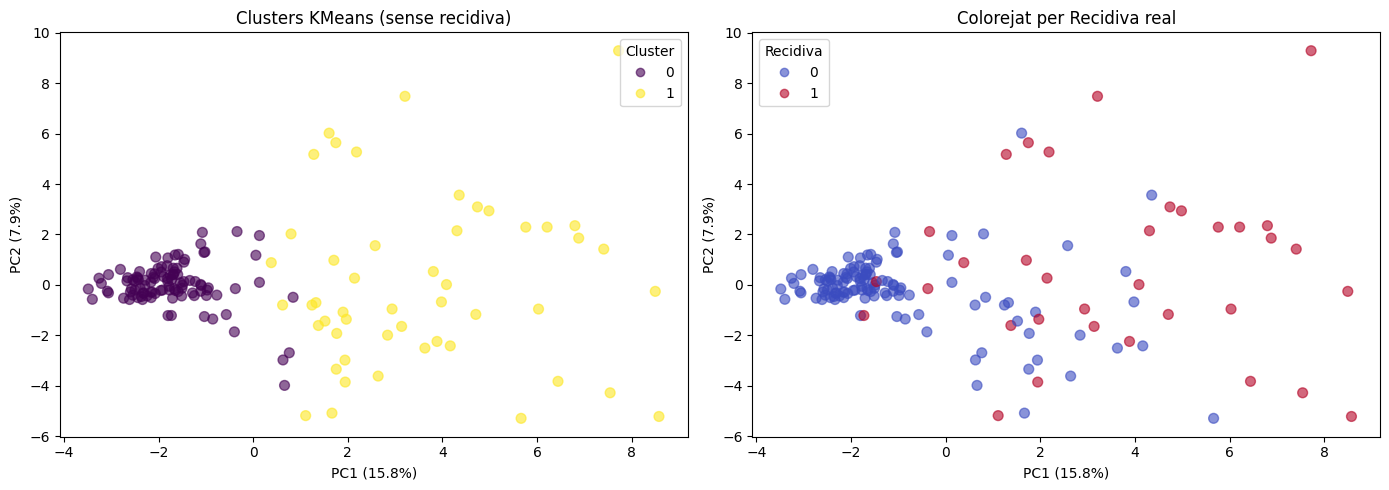


📊 Taula de contingència: Cluster vs Recidiva
Recidiva    0   1
Cluster          
0         100   4
1          20  30


In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Separar features i target
X = df_clean.drop(columns=['recidiva_exitus'])
y = df_clean['recidiva_exitus']

# Només columnes numèriques pel clustering
X_numeric = X.select_dtypes(include=[np.number])

print(f"Columnes numèriques: {X_numeric.shape[1]}")
print(f"Mostres totals: {X_numeric.shape[0]}")
print(f"NAs totals: {X_numeric.isna().sum().sum()}")

# Imputar NAs amb la mediana
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X_numeric)

print(f"Mostres després imputació: {X_imputed.shape[0]}")

# Escalar dades
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Clustering amb KMeans (2 clusters per comparar amb recidiva)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Reduir dimensionalitat amb PCA per visualitzar
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Crear figura amb 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Clusters de KMeans
scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6, s=50)
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
axes[0].set_title('Clusters KMeans (sense recidiva)')
axes[0].legend(*scatter1.legend_elements(), title='Cluster')

# Plot 2: Colorejat per Recidiva real
scatter2 = axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.6, s=50)
axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
axes[1].set_title('Colorejat per Recidiva real')
axes[1].legend(*scatter2.legend_elements(), title='Recidiva')

plt.tight_layout()
plt.show()

# Comparar clusters vs recidiva
print("\n📊 Taula de contingència: Cluster vs Recidiva")
print(pd.crosstab(clusters, y, rownames=['Cluster'], colnames=['Recidiva']))

PC1: 15.77% (acumulat: 15.77%)
PC2: 7.85% (acumulat: 23.62%)
PC3: 6.20% (acumulat: 29.82%)
PC4: 5.45% (acumulat: 35.27%)
PC5: 4.34% (acumulat: 39.61%)
PC6: 4.04% (acumulat: 43.66%)
PC7: 3.69% (acumulat: 47.35%)
PC8: 3.57% (acumulat: 50.92%)
PC9: 3.24% (acumulat: 54.16%)
PC10: 3.01% (acumulat: 57.18%)


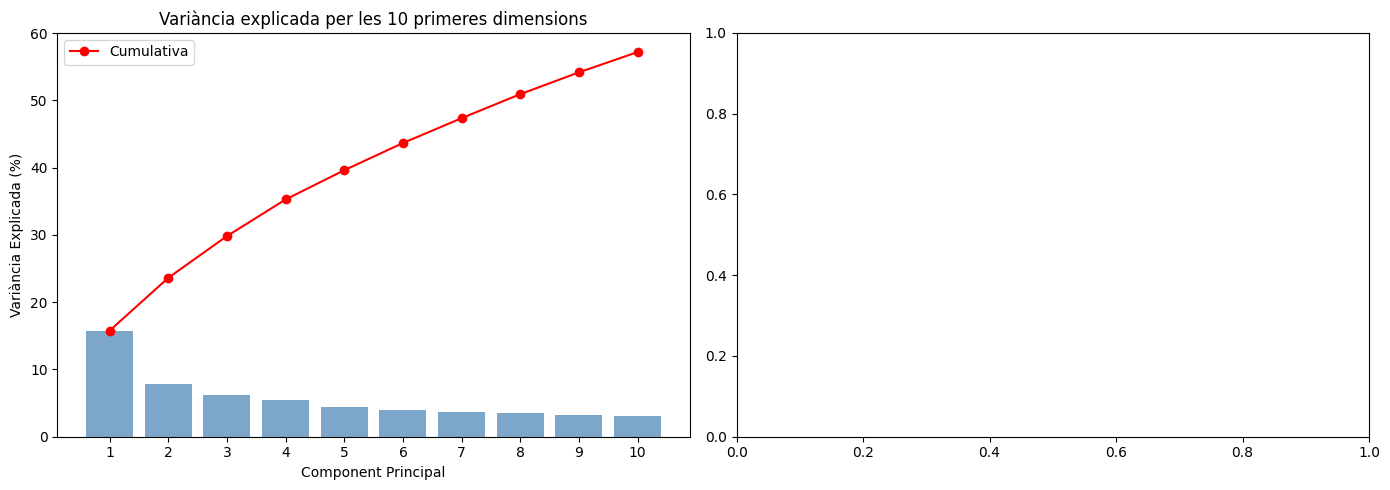

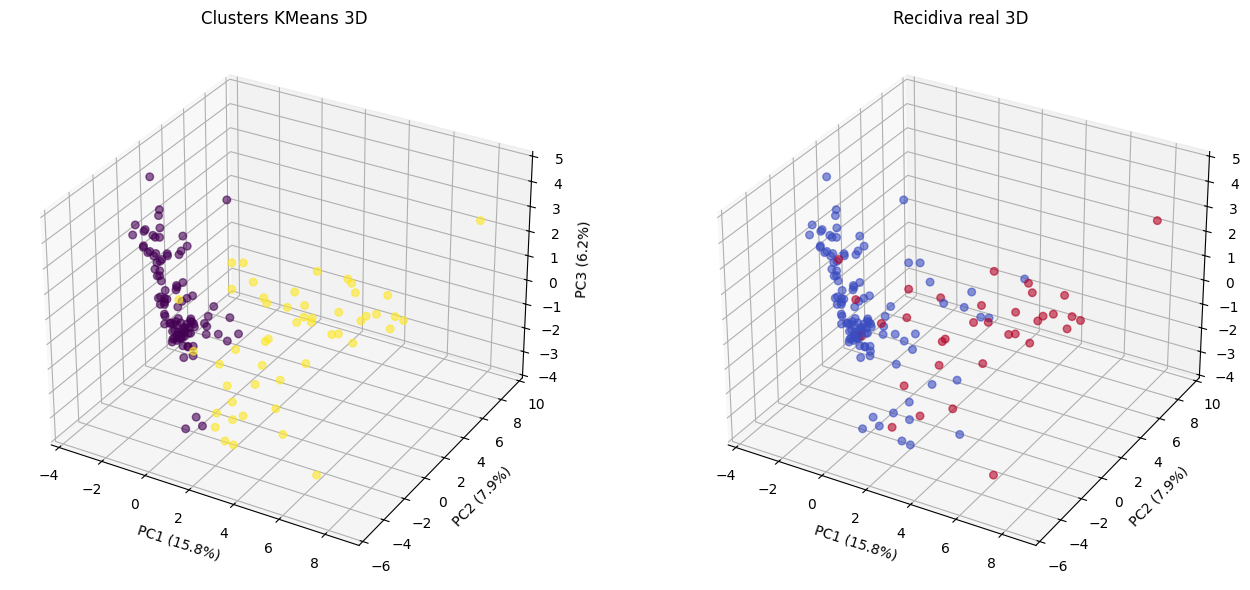


📊 Variància total explicada amb 3 components: 29.8%


In [10]:
from mpl_toolkits.mplot3d import Axes3D

# PCA amb 10 components per veure variabilitat
pca_10 = PCA(n_components=10)
pca_10.fit(X_scaled)

# Gràfic de variància explicada
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Variància per component
axes[0].bar(range(1, 11), pca_10.explained_variance_ratio_ * 100, alpha=0.7, color='steelblue')
axes[0].plot(range(1, 11), np.cumsum(pca_10.explained_variance_ratio_) * 100, 'ro-', label='Cumulativa')
axes[0].set_xlabel('Component Principal')
axes[0].set_ylabel('Variància Explicada (%)')
axes[0].set_title('Variància explicada per les 10 primeres dimensions')
axes[0].legend()
axes[0].set_xticks(range(1, 11))

# Taula de variància
for i, (var, cum) in enumerate(zip(pca_10.explained_variance_ratio_, np.cumsum(pca_10.explained_variance_ratio_))):
    print(f"PC{i+1}: {var*100:.2f}% (acumulat: {cum*100:.2f}%)")

plt.tight_layout()
plt.show()

# ============ PLOT 3D ============
# PCA amb 3 components
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

fig = plt.figure(figsize=(14, 6))

# Plot 3D - Clusters
ax1 = fig.add_subplot(121, projection='3d')
scatter1 = ax1.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], 
                       c=clusters, cmap='viridis', alpha=0.6, s=30)
ax1.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]*100:.1f}%)')
ax1.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]*100:.1f}%)')
ax1.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]*100:.1f}%)')
ax1.set_title('Clusters KMeans 3D')

# Plot 3D - Recidiva
ax2 = fig.add_subplot(122, projection='3d')
scatter2 = ax2.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], 
                       c=y, cmap='coolwarm', alpha=0.6, s=30)
ax2.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]*100:.1f}%)')
ax2.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]*100:.1f}%)')
ax2.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]*100:.1f}%)')
ax2.set_title('Recidiva real 3D')

plt.tight_layout()
plt.show()

print(f"\n📊 Variància total explicada amb 3 components: {sum(pca_3d.explained_variance_ratio_)*100:.1f}%")

In [11]:
# Crear nova variable: dosi per sessió
df_clean['dosis_per_sesion'] = df_clean['rt_dosis'] / df_clean['n_doisis_rt']

# Verificar
print(df_clean[['rt_dosis', 'n_doisis_rt', 'dosis_per_sesion']].head(10))
print(f"\nEstadístiques:")
print(df_clean['dosis_per_sesion'].describe())

   rt_dosis  n_doisis_rt  dosis_per_sesion
0       NaN          0.0               NaN
1       NaN          NaN               NaN
2       NaN          0.0               NaN
3       2.0         25.0              0.08
4       NaN          0.0               NaN
5       NaN          0.0               NaN
6       NaN          0.0               NaN
7       NaN          0.0               NaN
8       NaN          0.0               NaN
9       NaN          0.0               NaN

Estadístiques:
count    27.000000
mean      0.076555
std       0.017958
min       0.000000
25%       0.080000
50%       0.080000
75%       0.080000
max       0.111111
Name: dosis_per_sesion, dtype: float64
